In [1]:
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import product
import pandas as pd
import numpy as np
import numba as nb
import imageio
import os
import shutil

randomSeed = 100

%matplotlib inline
%config InlineBackend.figure_format = "retina"

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.hsv(np.linspace(0, 1, 256)) * 0.85, N=256
)
# colors = ["#95D3A2", "#FFFFBF", "#F79051", ]
colors = ["#5657A4", "#95D3A2", "#FFFFBF", "#F79051", "#A30644"]
cmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)
cmap_r = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors[::-1])

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns

sns.set_theme(
    style="ticks", 
    font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['animation.ffmpeg_path'] = "/opt/conda/bin/ffmpeg"

from main import *
from multiprocessing import Pool
import pandas as pd

SAVE_PATH = r"E:\MS_ExperimentData\general"
# SAVE_PATH = r"D:\MS_ExperimentData\general"

(0.0, 200.0)

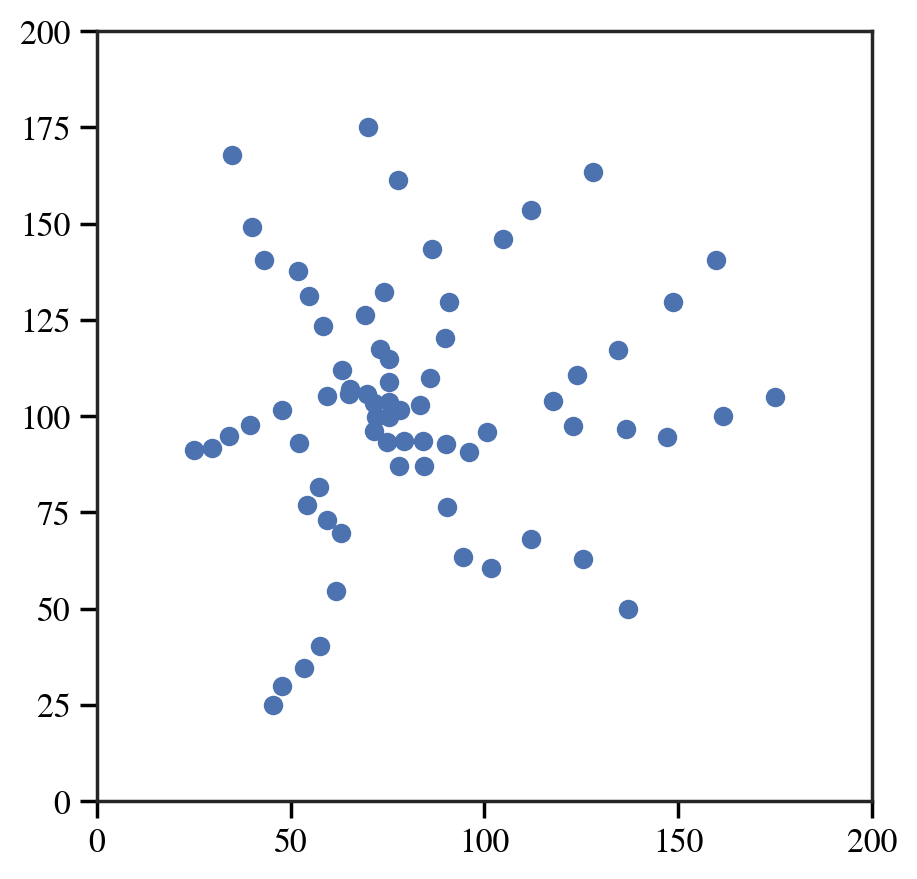

In [2]:
nodes = pd.read_parquet("Washington_Metrorail.parquet").set_index("name")
nodePosition = nodes[["lon", "lat"]].values
center = 100
patternHalfLength = 75
nodePosition = nodePosition - np.min(nodePosition, axis=0)
nodePosition = nodePosition / np.max(nodePosition, axis=0) * patternHalfLength * 2 + center - patternHalfLength
nodes[["lon", "lat"]] = nodePosition

plt.figure(figsize=(5, 5))
plt.scatter(nodePosition[:, 0], nodePosition[:, 1])
plt.xlim(0, center * 2)
plt.ylim(0, center * 2)

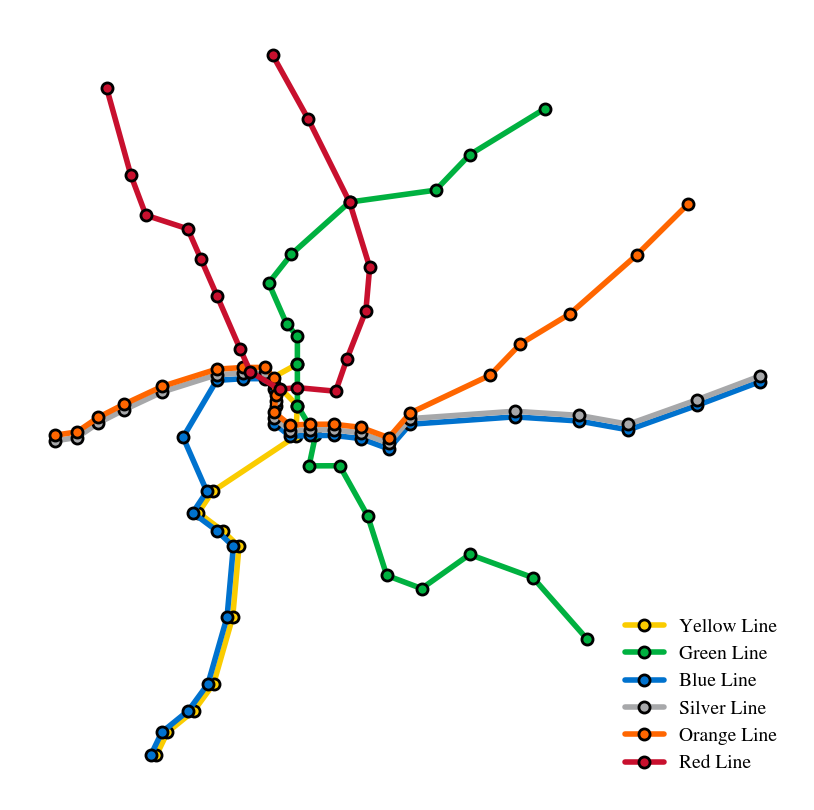

In [4]:
yellow = [
    "Huntington", "Eisenhower Avenue", "King Street–Old Town", "Braddock Road", "Potomac Yard",
    "Ronald Reagan Washington National Airport", "Crystal City", "Pentagon City", "Pentagon",
    "L'Enfant Plaza", 
    "Archives", "McPherson Square",
    "Mount Vernon Square", 
]
green = [
    "Branch Avenue", "Suitland", "Naylor Road", "Southern Avenue", "Congress Heights",
    "Anacostia", "Navy Yard–Ballpark", "Waterfront", "Federal Center Southwest",
    "Archives", "Mount Vernon Square", "Shaw–Howard University", "U Street", "Columbia Heights",
    "Georgia Avenue–Petworth", "Fort Totten", "West Hyattsville", "Hyattsville Crossing",
    "College Park–University of Maryland"
]
blue = [
    "Huntington", "Eisenhower Avenue", "King Street–Old Town", "Braddock Road", "Potomac Yard",
    "Ronald Reagan Washington National Airport", "Crystal City", "Pentagon City", "Pentagon",
    "Arlington Cemetery", "Foggy Bottom–GWU", "Farragut West", "McPherson Square", "Metro Center",
    "Federal Triangle", "Smithsonian", "L'Enfant Plaza", "Federal Center Southwest", "Capitol South",
    "Eastern Market", "Potomac Avenue", "Stadium–Armory", "Benning Road", "Capitol Heights",
    "Addison Road", "Morgan Boulevard", "Downtown Largo"
]
silver = [
    "Ballston–MU", "Virginia Square–GMU", "Clarendon", "Court House", "Rosslyn", "Foggy Bottom–GWU", 
    "Farragut West", "McPherson Square", "Metro Center",
    "Federal Triangle", "Smithsonian", "L'Enfant Plaza", "Federal Center Southwest", "Capitol South",
    "Eastern Market", "Potomac Avenue", "Stadium–Armory", "Benning Road", "Capitol Heights",
    "Addison Road", "Morgan Boulevard", "Downtown Largo"
]
orangle = [
    "Ballston–MU", "Virginia Square–GMU", "Clarendon", "Court House", "Rosslyn", "Foggy Bottom–GWU", 
    "Farragut West", "McPherson Square", "Metro Center",
    "Federal Triangle", "Smithsonian", "L'Enfant Plaza", "Federal Center Southwest", "Capitol South",
    "Eastern Market", "Potomac Avenue", "Stadium–Armory", "Minnesota Avenue", "Deanwood", "Cheverly", 
    "Landover", "New Carrollton"
]
red = [
    "Bethesda", "Friendship Heights", "Tenleytown–AU", "Van Ness–UDC", "Cleveland Park", "Woodley Park",
    "Dupont Circle", "Farragut North", "Metro Center", "Gallery Place", "Union Station", "NoMa–Gallaudet U",
    "Rhode Island Avenue–Brentwood", "Brookland–CUA", "Fort Totten", "Takoma", "Silver Spring"
]
purple = [
    "Bethesda", "Connecticut Avenue", 
]
yellowNodes = nodes.loc[yellow]
greenNodes = nodes.loc[green]
blueNodes = nodes.loc[blue]
silverNodes = nodes.loc[silver]
orangleNodes = nodes.loc[orangle]
redNodes = nodes.loc[red]

plt.figure(figsize=(5, 5))
# plt.scatter(nodePosition[:, 0], nodePosition[:, 1])

plt.plot(yellowNodes["lon"], yellowNodes["lat"], "o-", color="#FACC00", markeredgecolor="black",
         label="Yellow Line", markersize=4, linewidth=2)
plt.plot(greenNodes["lon"], greenNodes["lat"], "o-", color="#00B140", markeredgecolor="black",
         label="Green Line", markersize=4, linewidth=2)
plt.plot(blueNodes["lon"] - 1.2, blueNodes["lat"], "o-", color="#0072CE", markeredgecolor="black",
         label="Blue Line", markersize=4, linewidth=2)
plt.plot(silverNodes["lon"] - 1.2, silverNodes["lat"] + 1.2, "o-", color="#A7A8AA", markeredgecolor="black",
         label="Silver Line", markersize=4, linewidth=2)
plt.plot(orangleNodes["lon"] - 1.2, orangleNodes["lat"] + 2.4, "o-", color="#FF6600", markeredgecolor="black",
         label="Orange Line", markersize=4, linewidth=2)
plt.plot(redNodes["lon"], redNodes["lat"], "o-", color="#C8102E", markeredgecolor="black",
         label="Red Line", markersize=4, linewidth=2)

# plt.xlim(0, center * 2)
# plt.ylim(0, center * 2)
plt.legend(fontsize=7, frameon=False, loc="lower right")
plt.xticks([], [])
plt.yticks([], [])

for side in ['right', 'left', 'bottom', 'top']:
    plt.gca().spines[side].set_visible(False)

In [7]:
nodes["name"].values

array(['Pentagon', 'Dupont Circle', 'Cleveland Park', 'Rosslyn',
       'Braddock Road', 'Capitol South', 'Morgan Boulevard',
       'Ballston–MU', 'Farragut West', 'Stadium–Armory', 'Metro Center',
       'Union Station', 'Congress Heights', 'Deanwood', 'Branch Avenue',
       'Bethesda', 'King Street–Old Town', 'Tenleytown–AU',
       'McPherson Square', 'Federal Triangle',
       'College Park–University of Maryland', 'Hyattsville Crossing',
       'Virginia Square–GMU', 'Capitol Heights', 'Shaw–Howard University',
       'Crystal City', 'Clarendon', 'Pentagon City', 'Takoma',
       'Foggy Bottom–GWU', 'Potomac Avenue', 'Gallery Place',
       'Mount Vernon Square', 'Farragut North', 'Fort Totten',
       'Woodley Park', 'Naylor Road', 'Suitland', 'Minnesota Avenue',
       'Friendship Heights', 'Southern Avenue', 'Georgia Avenue–Petworth',
       'NoMa–Gallaudet U', 'Huntington', 'Arlington Cemetery',
       'West Hyattsville', 'Benning Road', 'U Street',
       'Ronald Reagan Was